**IMPORT VÀ XEM QUA DỮ LIỆU**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/GEC Vòng 3/gec_txn.xlsx')
df_userinfo= pd.read_excel('/content/gdrive/MyDrive/GEC Vòng 3/gec_user_info.xlsx')
df_geo = pd.read_csv('/content/gdrive/MyDrive/GEC Vòng 3/gec_geography.csv')

In [ ]:
df.head()

,user_id,date,platform,volume,fee
0,5146.0,2023-02-17,ios,205.716994,0.000000
1,12589.0,2023-02-19,android,422.123292,0.000000
2,246.0,2023-01-12,android,55.670352,0.042122
3,246.0,2023-01-12,android,59.027330,0.045337
4,NaN,2023-02-24,ios,295.797510,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139313 entries, 0 to 139312
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   139055 non-null  float64       
 1   date      139313 non-null  datetime64[ns]
 2   platform  139313 non-null  object        
 3   volume    139313 non-null  float64       
 4   fee       139313 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 5.3+ MB


**XỬ LÝ FILE TRANSACTION**

In [5]:
df_not_nan = df[df['user_id'].notna()]
df_not_nan

,user_id,date,platform,volume,fee
0,5146.0,2023-02-17,ios,205.716994,0.000000
1,12589.0,2023-02-19,android,422.123292,0.000000
2,246.0,2023-01-12,android,55.670352,0.042122
3,246.0,2023-01-12,android,59.027330,0.045337
5,12589.0,2023-02-24,android,896.170787,0.000000
...,...,...,...,...,...
139308,1482.0,2023-02-09,web,10.163855,0.000000
139309,6013.0,2023-02-10,web,0.773538,0.000000
139310,3929.0,2023-01-01,android,3.281520,0.002625
139311,8545.0,2023-01-05,android,1.010374,0.000804


**XỬ LÝ DF_GEO**

In [6]:
df_geo = df_geo.drop(df_geo.columns[[4, 5, 6, 7]], axis=1)

In [7]:
df_geo

,Country,Alpha-2_code,Latitude_(average),Longitude_(average)
0,Afghanistan,"""AF""","""33""","""65"""
1,Albania,"""AL""","""41""","""20"""
2,Algeria,"""DZ""","""28""","""3"""
3,American Samoa,"""AS""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""42.5""","""1.6"""
...,...,...,...,...
417,NaN,NaN,NaN,NaN
418,NaN,NaN,NaN,NaN
419,NaN,NaN,NaN,NaN
420,NaN,NaN,NaN,NaN


In [ ]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              257 non-null    object
 1   Alpha-2_code         257 non-null    object
 2   Latitude_(average)   256 non-null    object
 3   Longitude_(average)  256 non-null    object
dtypes: object(4)
memory usage: 13.3+ KB


In [8]:
#XÓA DẤU " " TRONG COLUMN ALPHA-2_CODE
df_geo['Alpha-2_code'] = df_geo['Alpha-2_code'].str.replace('"', '')
df_geo.head()

,Country,Alpha-2_code,Latitude_(average),Longitude_(average)
0,Afghanistan,AF,"""33""","""65"""
1,Albania,AL,"""41""","""20"""
2,Algeria,DZ,"""28""","""3"""
3,American Samoa,AS,"""-14.3333""","""-170"""
4,Andorra,AD,"""42.5""","""1.6"""


In [9]:
df_geo = df_geo.rename(columns={'Alpha-2_code': 'mp_country_code'})

In [10]:
#XỬ LÝ CÁC ROWS BỊ THỪA
df_geo = df_geo[df_geo['mp_country_code'].notna()]
df_geo

,Country,mp_country_code,Latitude_(average),Longitude_(average)
0,Afghanistan,AF,"""33""","""65"""
1,Albania,AL,"""41""","""20"""
2,Algeria,DZ,"""28""","""3"""
3,American Samoa,AS,"""-14.3333""","""-170"""
4,Andorra,AD,"""42.5""","""1.6"""
...,...,...,...,...
252,Western Sahara,EH,"""24.5""","""-13"""
253,Yemen,YE,"""15""","""48"""
254,Zambia,ZM,"""-15""","""30"""
255,Zimbabwe,ZW,"""-20""","""30"""


In [11]:
#XÓA CÁC DUPLICATES
df_geo_unique = df_geo.drop_duplicates(subset=['mp_country_code'], keep='first')
df_geo_unique

,Country,mp_country_code,Latitude_(average),Longitude_(average)
0,Afghanistan,AF,"""33""","""65"""
1,Albania,AL,"""41""","""20"""
2,Algeria,DZ,"""28""","""3"""
3,American Samoa,AS,"""-14.3333""","""-170"""
4,Andorra,AD,"""42.5""","""1.6"""
...,...,...,...,...
252,Western Sahara,EH,"""24.5""","""-13"""
253,Yemen,YE,"""15""","""48"""
254,Zambia,ZM,"""-15""","""30"""
255,Zimbabwe,ZW,"""-20""","""30"""


In [12]:
distinct_counts = df_geo_unique.nunique()
print(distinct_counts)


Country                245
mp_country_code        245
Latitude_(average)     176
Longitude_(average)    196
dtype: int64


**XỬ LÝ DF_USERINFO**

In [13]:
df_userinfo

,user_id,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
0,1.0,mobile,Surabaya,Android,ID,2022-11-01,NaT,NaN,NaN,NaN
1,15664.0,mobile,Coro,Windows,VE,2023-02-23,2023-02-23,2.0,1.0,65.000000
2,440.0,mobile,Dhaka,Android,BD,2023-02-08,2023-02-08,5.0,3.0,425.363636
3,8449.0,mobile,Copenhagen,Windows,DK,2023-02-13,NaT,NaN,NaN,NaN
4,20791.0,web,Ho Chi Minh City,Linux,VN,2023-02-06,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
122309,37329.0,mobile,Kolkata,Android,IN,2022-11-19,NaT,NaN,NaN,NaN
122310,37330.0,mobile,NaN,Android,BD,2022-10-16,NaT,NaN,NaN,NaN
122311,37332.0,mobile,Surabaya,Android,ID,2022-11-24,NaT,NaN,NaN,NaN
122312,37333.0,mobile,Dhaka,Android,BD,2022-10-10,NaT,NaN,NaN,NaN


In [ ]:
df_userinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           98272 non-null   float64       
 1   platform          122314 non-null  object        
 2   city              111329 non-null  object        
 3   os                122314 non-null  object        
 4   mp_country_code   122276 non-null  object        
 5   time              122314 non-null  datetime64[ns]
 6   date              47203 non-null   datetime64[ns]
 7   feature           47203 non-null   float64       
 8   session           47203 non-null   float64       
 9   time_per_session  47203 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 9.3+ MB


In [14]:
df_userinfo_notnan = df_userinfo[df_userinfo['user_id'].notna()]


*TẠO BẢNG USERINFO CÓ COUNTRY*

In [15]:
# Thực hiện join giữa df_userinfonotnan và df_geo trên cột chung là 'mp_country_code'
merged_df = df_userinfo_notnan.merge(df_geo_unique, left_on='mp_country_code', right_on='mp_country_code', how='left')

# Hiển thị các hàng của DataFrame đã merge
df_userinfo_new = pd.DataFrame(merged_df.drop(columns=['mp_country_code', 'Latitude_(average)', 'Longitude_(average)']))

df_userinfo_new=df_userinfo_new.drop_duplicates(subset=['user_id'], keep='first')
df_userinfo_new

,user_id,platform,city,os,time,date,feature,session,time_per_session,Country
0,1.0,mobile,Surabaya,Android,2022-11-01,NaT,NaN,NaN,NaN,Indonesia
1,15664.0,mobile,Coro,Windows,2023-02-23,2023-02-23,2.0,1.0,65.000000,"Venezuela, Bolivarian Republic of"
2,440.0,mobile,Dhaka,Android,2023-02-08,2023-02-08,5.0,3.0,425.363636,Bangladesh
3,8449.0,mobile,Copenhagen,Windows,2023-02-13,NaT,NaN,NaN,NaN,Denmark
4,20791.0,web,Ho Chi Minh City,Linux,2023-02-06,NaT,NaN,NaN,NaN,Viet Nam
...,...,...,...,...,...,...,...,...,...,...
98267,37329.0,mobile,Kolkata,Android,2022-11-19,NaT,NaN,NaN,NaN,India
98268,37330.0,mobile,NaN,Android,2022-10-16,NaT,NaN,NaN,NaN,Bangladesh
98269,37332.0,mobile,Surabaya,Android,2022-11-24,NaT,NaN,NaN,NaN,Indonesia
98270,37333.0,mobile,Dhaka,Android,2022-10-10,NaT,NaN,NaN,NaN,Bangladesh


In [16]:
df_userinfo_4later = df_userinfo_new.drop(columns=['platform', 'os', 'time','date','feature','session','time_per_session'])
df_userinfo_4later

,user_id,city,Country
0,1.0,Surabaya,Indonesia
1,15664.0,Coro,"Venezuela, Bolivarian Republic of"
2,440.0,Dhaka,Bangladesh
3,8449.0,Copenhagen,Denmark
4,20791.0,Ho Chi Minh City,Viet Nam
...,...,...,...
98267,37329.0,Kolkata,India
98268,37330.0,NaN,Bangladesh
98269,37332.0,Surabaya,Indonesia
98270,37333.0,Dhaka,Bangladesh


**DATA VISUALIZATION**

In [17]:
user_id_count = df_userinfo_new['user_id'].nunique()
country_count = df_userinfo_new['Country'].nunique()

print("Số lượng khách hàng:", user_id_count)
print("Số lượng nước:", country_count)


Số lượng khách hàng: 26645
Số lượng nước: 125


In [18]:
sns.color_palette('mako')

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

*TOP 5 NƯỚC NHIỀU KHÁCH HÀNG NHẤT*

In [ ]:
top5_nuoc_kh = df_userinfo_new[['Country']].value_counts().nlargest(5).reset_index()


top5_nuoc_kh = top5_nuoc_kh.rename(columns={top5_nuoc_kh.columns[1]: 'so_kh'})
top5_nuoc_kh

,Country,so_kh
0,Viet Nam,6790
1,Bangladesh,5677
2,Indonesia,4583
3,India,2033
4,Pakistan,1536


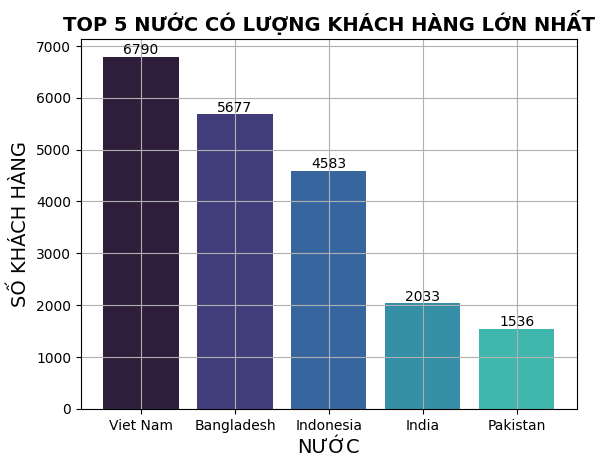

In [ ]:
palette = sns.color_palette('mako')
plt.bar(top5_nuoc_kh['Country'], top5_nuoc_kh['so_kh'], color=palette)
plt.title('TOP 5 NƯỚC CÓ LƯỢNG KHÁCH HÀNG LỚN NHẤT', fontsize=14, fontweight='bold')
plt.xlabel('NƯỚC', fontsize=14)
plt.ylabel('SỐ KHÁCH HÀNG', fontsize=14)
plt.grid(True)
# Thêm giá trị lên trên từng cột
for i, v in enumerate(top5_nuoc_kh['so_kh']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

*TOP 5 THÀNH PHỐ NHIỀU KHÁCH HÀNG NHẤT*

In [ ]:
top5_tp_kh = df_userinfo_new[['city']].value_counts().nlargest(5).reset_index()
top5_tp_kh = top5_tp_kh.rename(columns={top5_tp_kh.columns[1]: 'so_kh'})
top5_tp_kh

,city,so_kh
0,Hanoi,4301
1,Dhaka,2519
2,Ho Chi Minh City,1782
3,Jakarta,1411
4,Rawalpindi,505


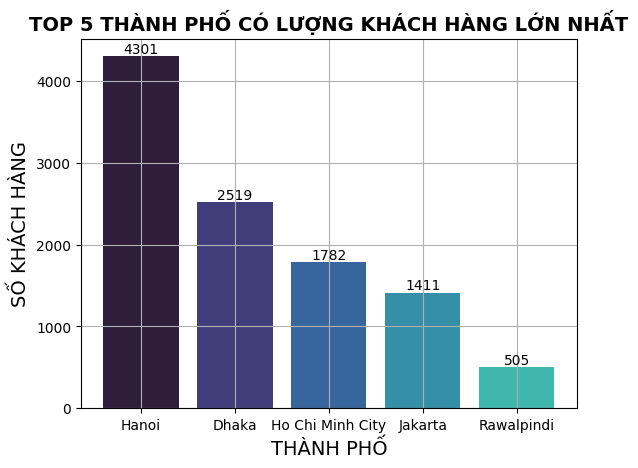

In [ ]:
palette = sns.color_palette('mako')
plt.bar(top5_tp_kh['city'], top5_tp_kh['so_kh'], color=palette)
plt.title('TOP 5 THÀNH PHỐ CÓ LƯỢNG KHÁCH HÀNG LỚN NHẤT', fontsize=14, fontweight='bold')
plt.xlabel('THÀNH PHỐ', fontsize=14)
plt.ylabel('SỐ KHÁCH HÀNG', fontsize=14)
plt.grid(True)
# Thêm giá trị lên trên từng cột
for i, v in enumerate(top5_tp_kh['so_kh']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

**PHÂN TÍCH THEO VOLUME GIAO DỊCH**

In [ ]:
user_id_count = len(df)
volume_sum = round(df['volume'].sum(), 2)

print("SỐ LƯỢNG GIAO DỊCH:", user_id_count)
print("TỔNG GIÁ TRỊ GIAO DỊCH:", volume_sum)

SỐ LƯỢNG GIAO DỊCH: 139313
TỔNG GIÁ TRỊ GIAO DỊCH: 3578109.18


*TOP 5 GIAO DỊCH THEO NƯỚC*

In [ ]:
#TẠO DF_CUSTOMERS ĐỂ MERGE
df_customers0 = df_not_nan.groupby(['user_id']).agg({'volume':'sum'})

In [ ]:
# Thực hiện join giữa df_customers và df_userinfo_new trên cột chung là 'user_id'
merged_df2 = df_customers0.merge(df_userinfo_4later, left_on='user_id', right_on='user_id', how='left')

# Hiển thị các hàng của DataFrame đã merge
df_customers_2 = pd.DataFrame(merged_df2)

df_customers_2=df_customers_2.drop_duplicates(subset=['user_id'], keep='first')
df_customers_2

,user_id,volume,city,Country
0,4.0,4710.457994,Coro,"Venezuela, Bolivarian Republic of"
1,23.0,0.182284,Cirebon,Indonesia
2,24.0,0.812294,Hanoi,Viet Nam
3,28.0,10.123025,Faisalabad,Pakistan
4,30.0,0.005339,NaN,NaN
...,...,...,...,...
5646,30644.0,1038.607788,Hanoi,Viet Nam
5647,30645.0,0.000031,Faisalabad,Pakistan
5648,30664.0,0.000027,NaN,NaN
5649,30669.0,0.000020,Islamabad,Pakistan


In [ ]:
#TẠO BẢNG TOP 5 NƯỚC GIAO DỊCH LỚN NHẤT
top5_nuoc_gd = df_customers_2.groupby('Country')['volume'].sum().nlargest(5)
top5_nuoc_gd = top5_nuoc_gd.round(2).reset_index()

top5_nuoc_gd['Country'] = top5_nuoc_gd['Country'].replace("Venezuela, Bolivarian Republic of", "Venezuela")
top5_nuoc_gd

,Country,volume
0,Venezuela,1790474.78
1,Viet Nam,933630.73
2,Indonesia,269808.57
3,Australia,112504.54
4,India,61547.52


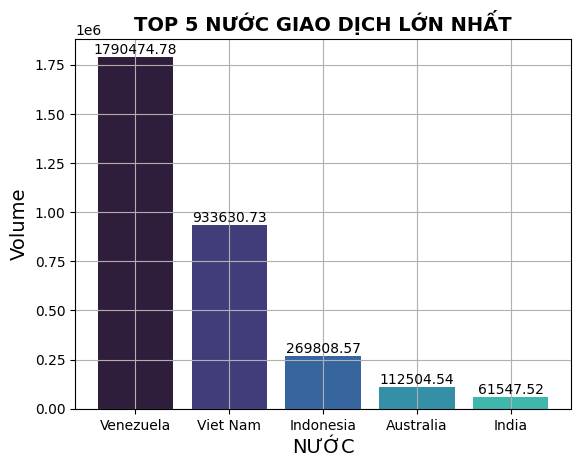

In [ ]:
palette = sns.color_palette('mako')
plt.bar(top5_nuoc_gd['Country'], top5_nuoc_gd['volume'], color=palette)
plt.title('TOP 5 NƯỚC GIAO DỊCH LỚN NHẤT', fontsize=14, fontweight='bold')
plt.xlabel('NƯỚC', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
# Thêm giá trị lên trên từng cột
for i, v in enumerate(top5_nuoc_gd['volume']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

*TOP 5 GIAO DỊCH THEO THÀNH PHỐ*

In [ ]:
top5_tp_gd = df_customers_2.groupby('city')['volume'].sum().nlargest(5)
top5_tp_gd = top5_tp_gd.round(2).reset_index()

top5_tp_gd

,city,volume
0,Coro,1683819.28
1,Hanoi,753557.46
2,Pekanbaru,208996.69
3,Adelaide,112488.29
4,Long Xuyen,93494.23


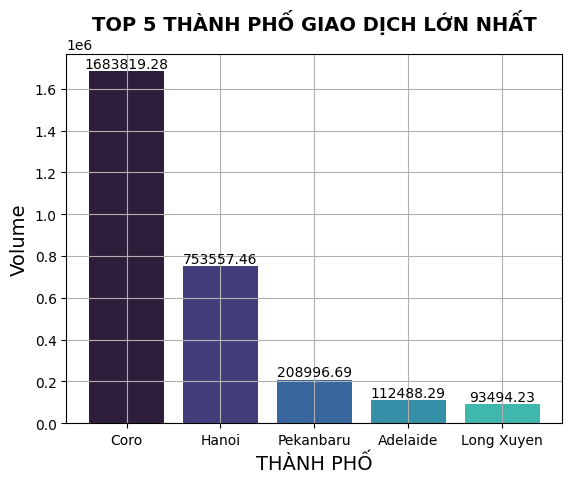

In [ ]:
palette = sns.color_palette('mako')
plt.bar(top5_tp_gd['city'], top5_tp_gd['volume'], color=palette)
plt.title('TOP 5 THÀNH PHỐ GIAO DỊCH LỚN NHẤT', fontsize=14, fontweight='bold')
plt.xlabel('THÀNH PHỐ', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
# Thêm giá trị lên trên từng cột
for i, v in enumerate(top5_tp_gd['volume']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

*GIAO DỊCH THEO TUẦN*

In [ ]:
df.head()

,user_id,date,platform,volume,fee
0,5146.0,2023-02-17,ios,205.716994,0.000000
1,12589.0,2023-02-19,android,422.123292,0.000000
2,246.0,2023-01-12,android,55.670352,0.042122
3,246.0,2023-01-12,android,59.027330,0.045337
4,NaN,2023-02-24,ios,295.797510,0.000000


In [ ]:
#TẠO BẢNG TIME SERIES GIAO DỊCH
data = df.groupby('date')['volume'].sum()
data = data.round().reset_index()
data = pd.DataFrame(data)
data.head()


,date,volume
0,2023-01-01,560.0
1,2023-01-02,3408.0
2,2023-01-03,1145.0
3,2023-01-04,1498.0
4,2023-01-05,938.0


In [ ]:
group_size = 7  # Số lượng giá trị trong mỗi nhóm

data['group'] = (data.index // group_size) + 1  # Tạo cột 'group' để đánh nhãn cho mỗi nhóm
grouped_data = data.groupby('group').agg({'date': 'max', 'volume': 'sum'})  # Nhóm và tính tổng volume cho mỗi nhóm
grouped_data = grouped_data.reset_index(drop=True)  # Đặt lại chỉ mục
grouped_data

,date,volume
0,2023-01-07,8235.0
1,2023-01-14,86245.0
2,2023-01-21,234287.0
3,2023-01-28,774830.0
4,2023-02-04,263503.0
5,2023-02-11,273274.0
6,2023-02-18,417078.0
7,2023-02-25,1070974.0
8,2023-02-28,449678.0


In [ ]:
for i, row in grouped_data.iterrows():
    grouped_data.at[i, 'date'] = f"Tuần {i+1}"
grouped_data['volume'] = grouped_data['volume'].astype(int)
print(grouped_data)

     date   volume
0  Tuần 1     8235
1  Tuần 2    86245
2  Tuần 3   234287
3  Tuần 4   774830
4  Tuần 5   263503
5  Tuần 6   273274
6  Tuần 7   417078
7  Tuần 8  1070974
8  Tuần 9   449678


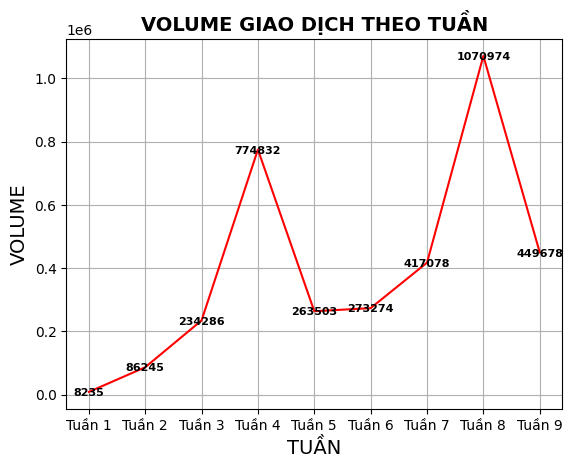

In [ ]:
plt.plot(grouped_data['date'], grouped_data['volume'], color = 'red')
plt.title('VOLUME GIAO DỊCH THEO TUẦN', fontsize=14, fontweight='bold')
plt.xlabel('TUẦN', fontsize=14)
plt.ylabel('VOLUME', fontsize=14)
plt.grid(True)
for i, v in enumerate(grouped_data['volume']):
    plt.text(i, v, str(v), ha='center', va='center_baseline', fontsize=8, fontweight='bold')

plt.show()

*GIAO DỊCH THEO THỨ*

In [ ]:
data['weekday'] = data['date'].dt.weekday
weekday_mapping = {
    0: "Thứ 2",
    1: "Thứ 3",
    2: "Thứ 4",
    3: "Thứ 5",
    4: "Thứ 6",
    5: "Thứ 7",
    6: "Chủ nhật"
}

data['weekday'] = data['weekday'].map(weekday_mapping)
pd.DataFrame(data.head())

,date,volume,group,weekday
0,2023-01-01,560.0,1,Chủ nhật
1,2023-01-02,3408.0,1,Thứ 2
2,2023-01-03,1145.0,1,Thứ 3
3,2023-01-04,1498.0,1,Thứ 4
4,2023-01-05,938.0,1,Thứ 5


In [ ]:
data_weekday = data.groupby('weekday')['volume'].sum().reset_index()

data_weekday = pd.DataFrame(data_weekday)
data_weekday['volume'] = data_weekday['volume'].astype(int)
data_weekday

,weekday,volume
0,Chủ nhật,495537
1,Thứ 2,819994
2,Thứ 3,538145
3,Thứ 4,371440
4,Thứ 5,414311
5,Thứ 6,514909
6,Thứ 7,423768


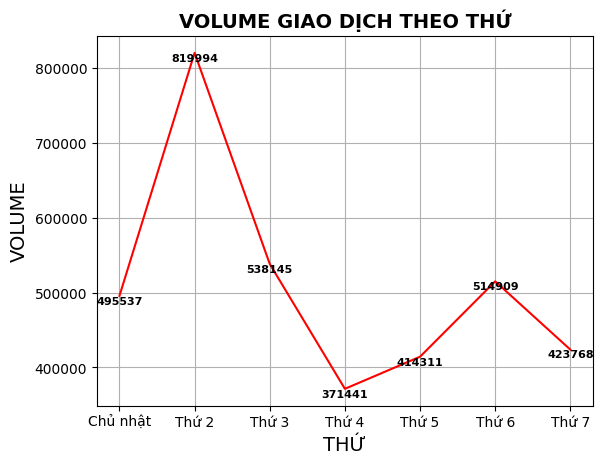

In [ ]:
plt.plot(data_weekday['weekday'], data_weekday['volume'], color = 'red')
plt.title('VOLUME GIAO DỊCH THEO THỨ', fontsize=14, fontweight='bold')
plt.xlabel('THỨ', fontsize=14)
plt.ylabel('VOLUME', fontsize=14)
plt.grid(True)
for i, v in enumerate(data_weekday['volume']):
  plt.text(i, v, str(v), ha='center', va='top', fontsize=8, fontweight='bold')

plt.show()

**PHÂN TÍCH PLATFORM & HỆ ĐIỀU HÀNH**

In [ ]:
df

,user_id,date,platform,volume,fee
0,5146.0,2023-02-17,ios,205.716994,0.000000
1,12589.0,2023-02-19,android,422.123292,0.000000
2,246.0,2023-01-12,android,55.670352,0.042122
3,246.0,2023-01-12,android,59.027330,0.045337
4,NaN,2023-02-24,ios,295.797510,0.000000
...,...,...,...,...,...
139308,1482.0,2023-02-09,web,10.163855,0.000000
139309,6013.0,2023-02-10,web,0.773538,0.000000
139310,3929.0,2023-01-01,android,3.281520,0.002625
139311,8545.0,2023-01-05,android,1.010374,0.000804


In [ ]:
data_platform_txn = df['platform'].value_counts().reset_index()
data_platform_txn.columns = ['platform', 'count']


data_platform_txn

,platform,count
0,android,76584
1,web,62301
2,ios,428


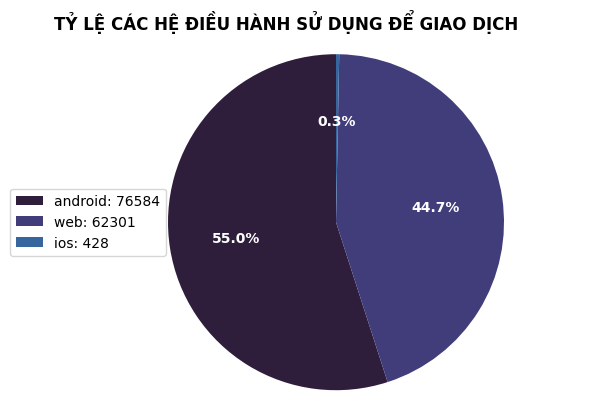

In [ ]:
palette = sns.color_palette('mako')
my_labels = 'android', 'web', 'ios'
my_colors = palette
plt.pie(data_platform_txn['count'], labels=my_labels, autopct='%1.1f%%', startangle=90, colors=my_colors, textprops={'color': 'white','weight': 'bold'})
plt.title('TỶ LỆ CÁC HỆ ĐIỀU HÀNH SỬ DỤNG ĐỂ GIAO DỊCH', weight='bold', x=0.4)
plt.axis('equal')

legend_labels = ['{}: {}'.format(label, count) for label, count in zip(data_platform_txn['platform'], data_platform_txn['count'])]
plt.legend(legend_labels,bbox_to_anchor=(0,0.5), loc= 'center')

plt.show()

*PLATFORM SỬ DỤNG DỊCH VỤ*

In [ ]:
df_userinfo

,user_id,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
0,1.0,mobile,Surabaya,Android,ID,2022-11-01,NaT,NaN,NaN,NaN
1,15664.0,mobile,Coro,Windows,VE,2023-02-23,2023-02-23,2.0,1.0,65.000000
2,440.0,mobile,Dhaka,Android,BD,2023-02-08,2023-02-08,5.0,3.0,425.363636
3,8449.0,mobile,Copenhagen,Windows,DK,2023-02-13,NaT,NaN,NaN,NaN
4,20791.0,web,Ho Chi Minh City,Linux,VN,2023-02-06,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
122309,37329.0,mobile,Kolkata,Android,IN,2022-11-19,NaT,NaN,NaN,NaN
122310,37330.0,mobile,NaN,Android,BD,2022-10-16,NaT,NaN,NaN,NaN
122311,37332.0,mobile,Surabaya,Android,ID,2022-11-24,NaT,NaN,NaN,NaN
122312,37333.0,mobile,Dhaka,Android,BD,2022-10-10,NaT,NaN,NaN,NaN


In [ ]:
data_platform_userinfo = df_userinfo['platform'].value_counts().reset_index()
data_platform_userinfo.columns = ['platform', 'count']


data_platform_userinfo

,platform,count
0,mobile,102933
1,web,19381


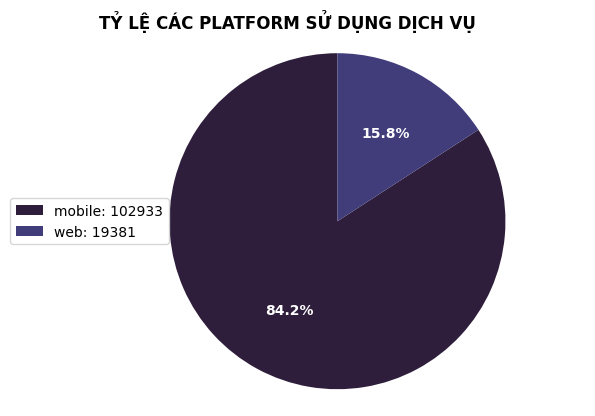

In [ ]:
palette = sns.color_palette('mako')
my_labels = 'mobile', 'web'
my_colors = palette
plt.pie(data_platform_userinfo['count'], labels=my_labels, autopct='%1.1f%%', startangle=90, colors=my_colors, textprops={'color': 'white','weight': 'bold'})
plt.title('TỶ LỆ CÁC PLATFORM SỬ DỤNG DỊCH VỤ', weight='bold', x=0.4)
plt.axis('equal')

legend_labels = ['{}: {}'.format(label, count) for label, count in zip(data_platform_userinfo['platform'], data_platform_userinfo['count'])]
plt.legend(legend_labels,bbox_to_anchor=(0,0.5), loc= 'center')

plt.show()

*HỆ ĐIỀU HÀNH SỬ DỤNG DỊCH VỤ*

In [ ]:
data_os_userinfo = df_userinfo['os'].value_counts().reset_index()
data_os_userinfo.columns = ['os', 'count']


data_os_userinfo

,os,count
0,Android,93994
1,Windows,21263
2,Mac OS X,3795
3,iOS,2924
4,Linux,223
5,iPadOS,108
6,Chrome OS,7


In [ ]:
# Nhóm 3 dòng cuối thành một dòng và tính tổng của cột count
other_row = pd.DataFrame({
    'os': ['Khác'],
    'count': [data_os_userinfo['count'].iloc[-3:].sum()]
})

# Xóa 3 dòng cuối
data_os_userinfo = data_os_userinfo.iloc[:-3]

# Gộp DataFrame gốc với dòng "Khác"
data_os_userinfo = pd.concat([data_os_userinfo, other_row])

# In kết quả
print(data_os_userinfo)


         os  count
0   Android  93994
1   Windows  21263
2  Mac OS X   3795
3       iOS   2924
0      Khác    338


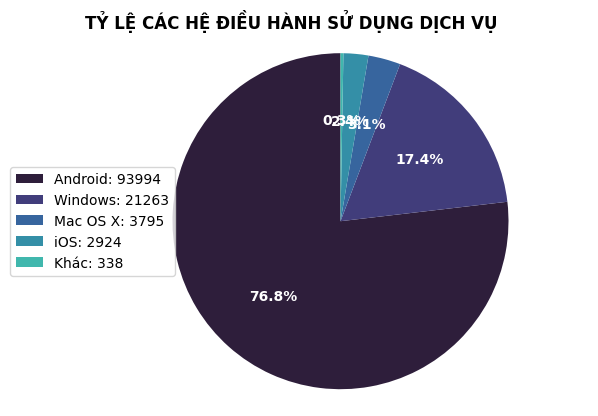

In [ ]:
palette = sns.color_palette('mako')
my_labels = 'Android', 'Windows', 'Mac OS X', 'iOS', 'Khác'
my_colors = palette
plt.pie(data_os_userinfo['count'], labels=my_labels, autopct='%1.1f%%', startangle=90, colors=my_colors, textprops={'color': 'white','weight': 'bold'})
plt.title('TỶ LỆ CÁC HỆ ĐIỀU HÀNH SỬ DỤNG DỊCH VỤ', weight='bold', x=0.4)
plt.axis('equal')

legend_labels = ['{}: {}'.format(label, count) for label, count in zip(data_os_userinfo['os'], data_os_userinfo['count'])]
plt.legend(legend_labels,bbox_to_anchor=(0,0.5), loc= 'center')

plt.show()

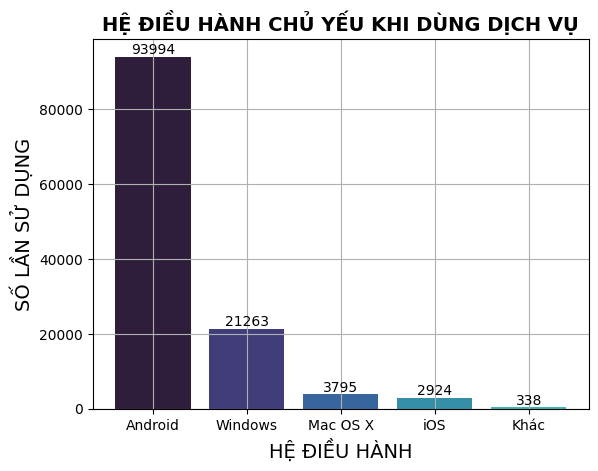

In [ ]:
palette = sns.color_palette('mako')
plt.bar(data_os_userinfo['os'], data_os_userinfo['count'], color=palette)
plt.title('HỆ ĐIỀU HÀNH CHỦ YẾU KHI DÙNG DỊCH VỤ', fontsize=14, fontweight='bold')
plt.xlabel('HỆ ĐIỀU HÀNH', fontsize=14)
plt.ylabel('SỐ LẦN SỬ DỤNG', fontsize=14)
plt.grid(True)
# Thêm giá trị lên trên từng cột
for i, v in enumerate(data_os_userinfo['count']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

*SESSION VÀ FEATURE*

In [19]:
#Xóa các duplicates của user_id trong cùng 1 ngày trong bảng user info
data_userinfo_unique = df_userinfo.drop_duplicates(subset=['user_id', 'time'], keep='first')
data_userinfo_unique

,user_id,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
0,1.0,mobile,Surabaya,Android,ID,2022-11-01,NaT,NaN,NaN,NaN
1,15664.0,mobile,Coro,Windows,VE,2023-02-23,2023-02-23,2.0,1.0,65.000000
2,440.0,mobile,Dhaka,Android,BD,2023-02-08,2023-02-08,5.0,3.0,425.363636
3,8449.0,mobile,Copenhagen,Windows,DK,2023-02-13,NaT,NaN,NaN,NaN
4,20791.0,web,Ho Chi Minh City,Linux,VN,2023-02-06,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
122309,37329.0,mobile,Kolkata,Android,IN,2022-11-19,NaT,NaN,NaN,NaN
122310,37330.0,mobile,NaN,Android,BD,2022-10-16,NaT,NaN,NaN,NaN
122311,37332.0,mobile,Surabaya,Android,ID,2022-11-24,NaT,NaN,NaN,NaN
122312,37333.0,mobile,Dhaka,Android,BD,2022-10-10,NaT,NaN,NaN,NaN


In [20]:
data_session_userinfo = data_userinfo_unique['session'].value_counts().nlargest(5).reset_index()
data_session_userinfo.columns = ['session', 'count']


data_session_userinfo

,session,count
0,1.0,22581
1,2.0,6942
2,3.0,2297
3,4.0,836
4,5.0,262


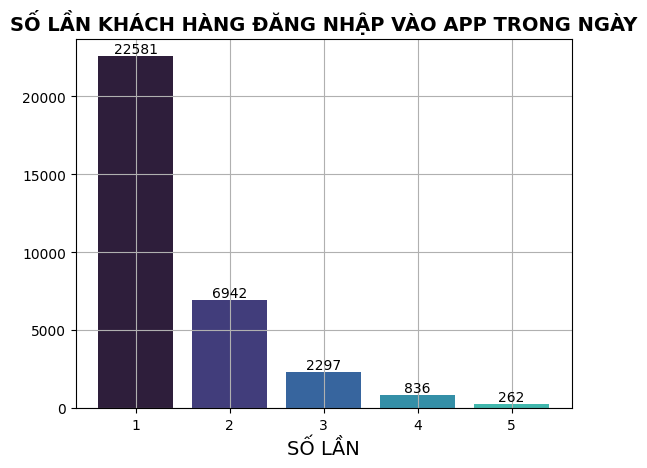

In [21]:
palette = sns.color_palette('mako')
plt.bar(data_session_userinfo['session'], data_session_userinfo['count'], color=palette)
plt.title('SỐ LẦN KHÁCH HÀNG ĐĂNG NHẬP VÀO APP TRONG NGÀY' , fontsize=14, fontweight='bold')
plt.xlabel('SỐ LẦN', fontsize=14)
plt.ylabel('', fontsize=14)
plt.grid(True)
# Thêm giá trị lên trên từng cột
for i, v in enumerate(data_session_userinfo['count']):
    plt.text(i+1, v, str(v), ha='center', va='bottom')
plt.show()

In [23]:
data_feature_userinfo = data_userinfo_unique['feature'].value_counts().nlargest(5).reset_index()
data_feature_userinfo.columns = ['feature', 'count']

data_feature_userinfo['feature'] = data_feature_userinfo['feature'].astype(int)
data_feature_userinfo

,feature,count
0,3,6718
1,4,6164
2,2,5697
3,5,5163
4,6,2972


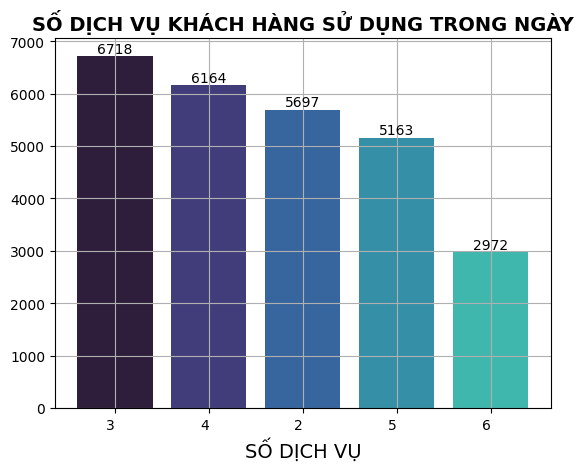

In [24]:
# Sắp xếp DataFrame theo cột 'count' theo thứ tự giảm dần
data_feature_userinfo_sorted = data_feature_userinfo.sort_values(by='count', ascending=False)

# Định nghĩa màu sắc
palette = sns.color_palette('mako')

# Vẽ biểu đồ cột
plt.bar(range(len(data_feature_userinfo_sorted)), data_feature_userinfo_sorted['count'], color=palette)
plt.title('SỐ DỊCH VỤ KHÁCH HÀNG SỬ DỤNG TRONG NGÀY', fontsize=14, fontweight='bold')
plt.xlabel('SỐ DỊCH VỤ', fontsize=14)
plt.ylabel('', fontsize=14)
plt.grid(True)

# Thêm giá trị lên trên từng cột
for i, v in enumerate(data_feature_userinfo_sorted['count']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(range(len(data_feature_userinfo_sorted)), data_feature_userinfo_sorted['feature'], ha='right')  # Đặt nhãn trục Ox

plt.show()


*TIME PER SESSION*

In [ ]:
data_userinfo_unique

,user_id,platform,city,os,mp_country_code,time,date,feature,session,time_per_session
0,1.0,mobile,Surabaya,Android,ID,2022-11-01,NaT,NaN,NaN,NaN
1,15664.0,mobile,Coro,Windows,VE,2023-02-23,2023-02-23,2.0,1.0,65.000000
2,440.0,mobile,Dhaka,Android,BD,2023-02-08,2023-02-08,5.0,3.0,425.363636
3,8449.0,mobile,Copenhagen,Windows,DK,2023-02-13,NaT,NaN,NaN,NaN
4,20791.0,web,Ho Chi Minh City,Linux,VN,2023-02-06,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
122309,37329.0,mobile,Kolkata,Android,IN,2022-11-19,NaT,NaN,NaN,NaN
122310,37330.0,mobile,NaN,Android,BD,2022-10-16,NaT,NaN,NaN,NaN
122311,37332.0,mobile,Surabaya,Android,ID,2022-11-24,NaT,NaN,NaN,NaN
122312,37333.0,mobile,Dhaka,Android,BD,2022-10-10,NaT,NaN,NaN,NaN


In [ ]:
# Nhân cột 'time_per_session' với cột 'session'
df_time_userin4 = data_userinfo_unique
df_time_userin4['time_per_session'] = df_time_userin4['time_per_session'] * df_time_userin4['session']

# Chuyển đổi cột 'time_per_session' từ giây sang phút
df_time_userin4['time_per_session'] = df_time_userin4['time_per_session'] / 60

# Tạo cột mới 'time_category' dựa trên giá trị trong cột 'time_per_session'
conditions = [
    (df_time_userin4['time_per_session'] < 1),
    (df_time_userin4['time_per_session'] >= 1) & (df_time_userin4['time_per_session'] <= 5),
    (df_time_userin4['time_per_session'] > 5) & (df_time_userin4['time_per_session'] <= 10),
    (df_time_userin4['time_per_session'] > 10) & (df_time_userin4['time_per_session'] <= 30),
    (df_time_userin4['time_per_session'] > 30)
]
categories = ['Dưới 1p', '1-5p', '5-10p', '10-30p', 'Trên 30p']

df_time_userin4['time_category'] = pd.Series(pd.Categorical(np.select(conditions, categories)))

# Hiển thị DataFrame đã được cập nhật
pd.DataFrame((df_time_userin4))

,user_id,platform,city,os,mp_country_code,time,date,feature,session,time_per_session,time_category
0,1.0,mobile,Surabaya,Android,ID,2022-11-01,NaT,NaN,NaN,NaN,0
1,15664.0,mobile,Coro,Windows,VE,2023-02-23,2023-02-23,2.0,1.0,0.018056,Dưới 1p
2,440.0,mobile,Dhaka,Android,BD,2023-02-08,2023-02-08,5.0,3.0,1.063409,1-5p
3,8449.0,mobile,Copenhagen,Windows,DK,2023-02-13,NaT,NaN,NaN,NaN,0
4,20791.0,web,Ho Chi Minh City,Linux,VN,2023-02-06,NaT,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
122309,37329.0,mobile,Kolkata,Android,IN,2022-11-19,NaT,NaN,NaN,NaN,NaN
122310,37330.0,mobile,NaN,Android,BD,2022-10-16,NaT,NaN,NaN,NaN,NaN
122311,37332.0,mobile,Surabaya,Android,ID,2022-11-24,NaT,NaN,NaN,NaN,NaN
122312,37333.0,mobile,Dhaka,Android,BD,2022-10-10,NaT,NaN,NaN,NaN,NaN


In [ ]:
data_time_userinfo = df_time_userin4['time_category'].value_counts().reset_index()
data_time_userinfo.columns = ['time_category', 'count']
data_time_userinfo = data_time_userinfo.drop(data_time_userinfo.index[0]) #drop giá trị time = 0 do null
data_time_userinfo

,time_category,count
1,Dưới 1p,9327
2,1-5p,5193
3,10-30p,3522
4,Trên 30p,2322
5,5-10p,2054


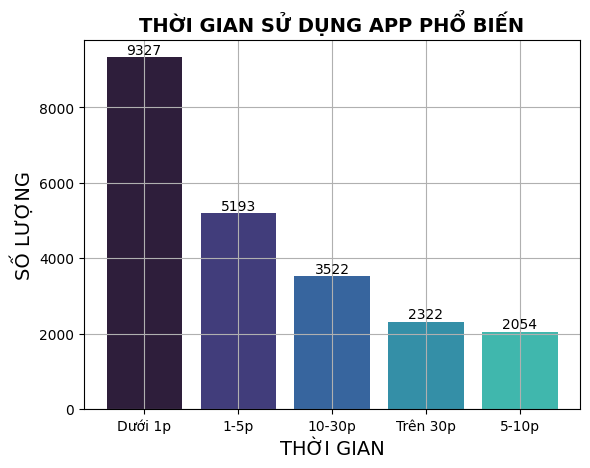

In [ ]:
palette = sns.color_palette('mako')
plt.bar(data_time_userinfo['time_category'], data_time_userinfo['count'], color=palette)
plt.title('THỜI GIAN SỬ DỤNG APP PHỔ BIẾN' , fontsize=14, fontweight='bold')
plt.xlabel('THỜI GIAN', fontsize=14)
plt.ylabel('SỐ LƯỢNG', fontsize=14)
plt.grid(True)
# Thêm giá trị lên trên từng cột
for i, v in enumerate(data_time_userinfo['count']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

**RFM ANALYSIS + ELBOW METHOD**


*TẠO VÀ XỬ LÝ CỘT RFM*

In [25]:
# Lấy ngày lớn nhất trong cột date
import datetime
current_date = max(df_not_nan['date']) + datetime.timedelta(days=1)

In [26]:
df_not_nan

,user_id,date,platform,volume,fee
0,5146.0,2023-02-17,ios,205.716994,0.000000
1,12589.0,2023-02-19,android,422.123292,0.000000
2,246.0,2023-01-12,android,55.670352,0.042122
3,246.0,2023-01-12,android,59.027330,0.045337
5,12589.0,2023-02-24,android,896.170787,0.000000
...,...,...,...,...,...
139308,1482.0,2023-02-09,web,10.163855,0.000000
139309,6013.0,2023-02-10,web,0.773538,0.000000
139310,3929.0,2023-01-01,android,3.281520,0.002625
139311,8545.0,2023-01-05,android,1.010374,0.000804


In [27]:
import datetime

current_date = datetime.datetime(2023, 3, 1)

In [28]:
# Group by user_id để tính R, F, M

df_customers = df_not_nan.groupby(['user_id']).agg(
    {'date': lambda x: (current_date- x.max()).days,
     'user_id':'count',
     'volume':'sum'})

In [ ]:
df_customers.head(10)

,Recency,Frequency,MonetaryValue
user_id,,,
4.0,2,102,4710.457994
23.0,1,35,0.182284
24.0,2,37,0.812294
28.0,41,2,10.123025
30.0,6,2,0.005339
31.0,2,13,0.000067
33.0,1,62,0.000186
48.0,10,40,0.000094
49.0,41,1,5.602616


In [29]:
df_customers.rename(columns={'date':'Recency','user_id':'Frequency','volume':'MonetaryValue'}, inplace=True)

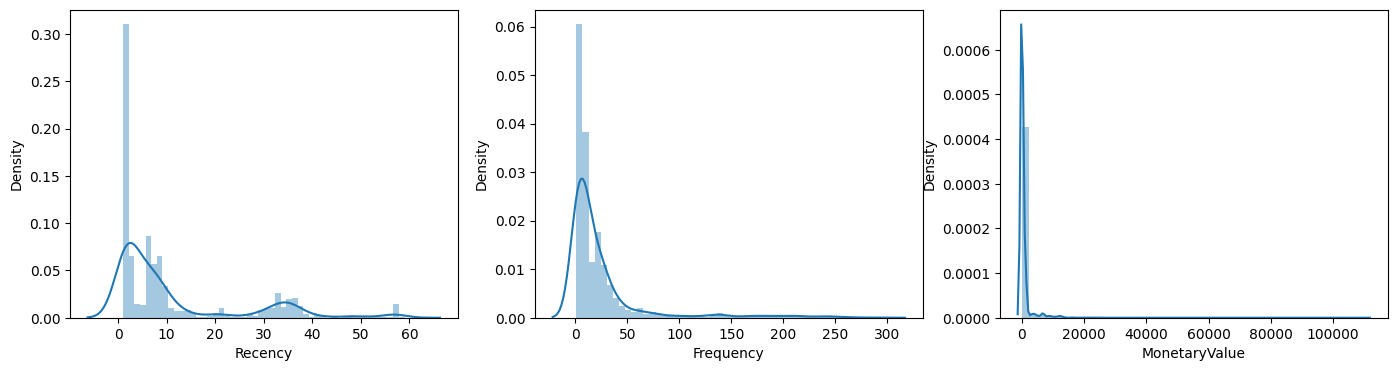

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(17,4))
sns.distplot(df_customers['Recency'], ax = ax[0])
sns.distplot(df_customers['Frequency'], ax = ax[1])
sns.distplot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

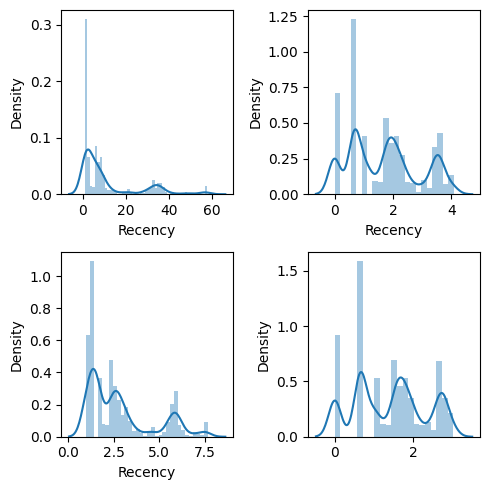

1.66
0.32
1.07
0.07


In [ ]:
analyze_skewness('Recency')

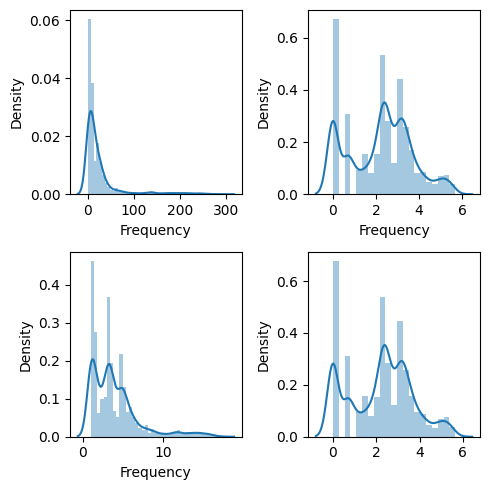

3.39
0.01
1.79
0.0


In [ ]:
analyze_skewness('Frequency')

In [ ]:
from scipy import stats
def analyze_skewness_money(x):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(x, ax=ax[0])
    sns.distplot(np.cbrt(x), ax=ax[1])
    plt.tight_layout()
    plt.show()
    print(stats.skew(np.cbrt(x)))

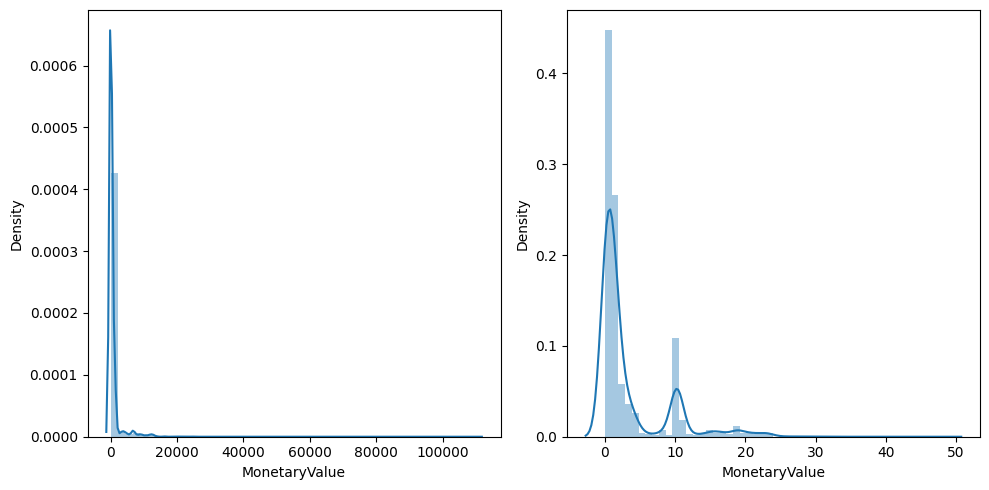

2.153254137945016


In [ ]:
analyze_skewness_money(df_customers['MonetaryValue'])

In [ ]:
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values
df_customers_t.head(10)


,Recency,Frequency,MonetaryValue
0,0.657009,4.602618,16.763102
1,0.000000,3.542128,0.567000
2,0.657009,3.597282,0.933049
3,2.819182,0.692644,2.163234
4,1.563268,0.692644,0.174780
5,0.657009,2.558064,0.040598
6,0.000000,4.109327,0.057088
7,1.934615,3.674649,0.045542
8,2.819182,0.000000,1.776085
9,1.009679,0.692644,3.303531


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)

In [ ]:
pd.DataFrame(df_customers_t).head(10)

,0,1,2
0,-0.828745,1.638060,2.621612
1,-1.556709,0.915992,-0.538911
2,-0.828745,0.953546,-0.467480
3,1.566935,-1.024167,-0.227420
4,0.175387,-1.024167,-0.615449
5,-0.828745,0.245962,-0.641633
6,-1.556709,1.302188,-0.638415
7,0.586839,1.006223,-0.640669
8,1.566935,-1.495775,-0.302969
9,-0.437988,-1.024167,-0.004901


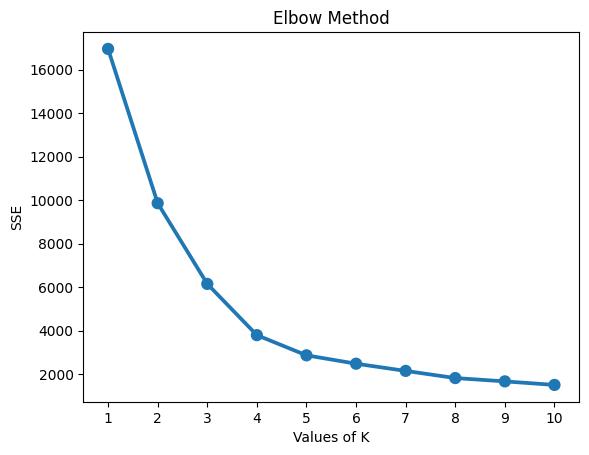

In [ ]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_

plt.title('Elbow Method')
plt.xlabel('Values of K')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, silhouette_score

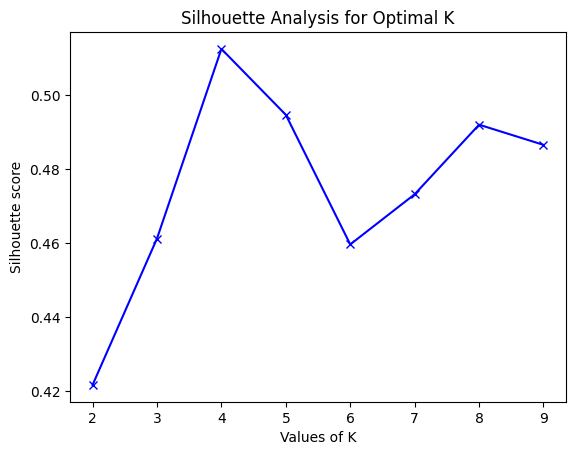

In [ ]:
silhouette_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_customers_t)
    silhouette_avg.append(silhouette_score(df_customers_t, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

*CHỌN K = 4*

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_customers_t)

KMeans(n_clusters=4, random_state=42)

In [ ]:
silhouette_score_average = silhouette_score(df_customers_t, model.predict(df_customers_t))

print(silhouette_score_average)

0.5125812030946733


In [ ]:
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
user_id,,,,
4.0,2,102,4710.457994,2
23.0,1,35,0.182284,0
24.0,2,37,0.812294,0
28.0,41,2,10.123025,1
30.0,6,2,0.005339,1


In [ ]:
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,2.12,31.89,10.56
1,13.75,6.63,13.46
2,2.24,149.68,7270.97
3,33.65,3.29,1249.95


In [ ]:
df_customers.to_csv('df_customers.csv', index=True)